<h2>Лабораторна робота</h2>

<h3>студентки групи МІТ-31</h3>

<h2>Агафонової Мирослави</h2>


In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [41]:
import zipfile

In [42]:
zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [43]:
import os
main_dir="101_food_classes_10_percent"

In [44]:
for dirpath, dirnames, filenames in os.walk(main_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent\test'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\apple_pie'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\baby_back_ribs'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\baklava'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beef_carpaccio'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beef_tartare'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beet_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beignets'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\bibimbap'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\bread_pudding'.
There are 0 directories and 250 images in '10

In [45]:
import pathlib
import numpy as np
data_dir = pathlib.Path("101_food_classes_10_percent/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [46]:
a, b, c = 0, 30, 60

classes = []
arr = (a,b,c)
for i in range(len(class_names)):
    if i in arr:
        classes.append(class_names[i])

print(classes)


['apple_pie', 'deviled_eggs', 'lobster_bisque']


Image shape: (512, 512, 3)


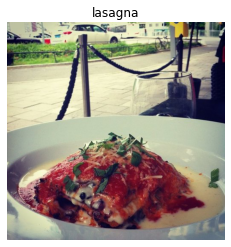

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

  # View a random image from the training dataset
img = view_random_image(target_dir="101_food_classes_10_percent/train2/",
                        target_class="lasagna")

In [48]:
img

array([[[181, 187, 175],
        [172, 178, 164],
        [171, 175, 160],
        ...,
        [ 23,  29,  53],
        [ 21,  25,  37],
        [ 19,  20,  25]],

       [[158, 164, 152],
        [153, 159, 145],
        [151, 158, 142],
        ...,
        [ 10,  16,  38],
        [ 15,  19,  31],
        [ 15,  18,  23]],

       [[146, 152, 140],
        [150, 156, 142],
        [151, 158, 142],
        ...,
        [  9,  16,  35],
        [ 18,  22,  34],
        [ 20,  23,  30]],

       ...,

       [[122, 120, 125],
        [126, 124, 129],
        [128, 126, 131],
        ...,
        [104, 124, 135],
        [104, 124, 135],
        [104, 124, 135]],

       [[140, 138, 141],
        [140, 138, 143],
        [136, 134, 139],
        ...,
        [103, 123, 134],
        [104, 124, 135],
        [105, 125, 136]],

       [[158, 156, 159],
        [155, 153, 158],
        [146, 144, 149],
        ...,
        [102, 122, 133],
        [104, 124, 135],
        [106, 126, 137]]

In [49]:
img/255.

array([[[0.70980392, 0.73333333, 0.68627451],
        [0.6745098 , 0.69803922, 0.64313725],
        [0.67058824, 0.68627451, 0.62745098],
        ...,
        [0.09019608, 0.11372549, 0.20784314],
        [0.08235294, 0.09803922, 0.14509804],
        [0.0745098 , 0.07843137, 0.09803922]],

       [[0.61960784, 0.64313725, 0.59607843],
        [0.6       , 0.62352941, 0.56862745],
        [0.59215686, 0.61960784, 0.55686275],
        ...,
        [0.03921569, 0.0627451 , 0.14901961],
        [0.05882353, 0.0745098 , 0.12156863],
        [0.05882353, 0.07058824, 0.09019608]],

       [[0.57254902, 0.59607843, 0.54901961],
        [0.58823529, 0.61176471, 0.55686275],
        [0.59215686, 0.61960784, 0.55686275],
        ...,
        [0.03529412, 0.0627451 , 0.1372549 ],
        [0.07058824, 0.08627451, 0.13333333],
        [0.07843137, 0.09019608, 0.11764706]],

       ...,

       [[0.47843137, 0.47058824, 0.49019608],
        [0.49411765, 0.48627451, 0.50588235],
        [0.50196078, 0

In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = main_dir+"/train2/"
test_dir = main_dir+"/test2/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="sparse", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="sparse",
                                               seed=42)



model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="softmax")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=2,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 300 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Epoch 1/2
10/10 [==============================] - 13s 1s/step - loss: -5.2492 - accuracy: 0.2500 - val_loss: -23.1240 - val_accuracy: 0.2500
Epoch 2/2
10/10 [==============================] - 12s 1s/step - loss: -87.7198 - accuracy: 0.2500 - val_loss: -219.1505 - val_accuracy: 0.2500


In [51]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 28090)            

<AxesSubplot:title={'center':'History ins_model'}, xlabel='epochs', ylabel='loss'>

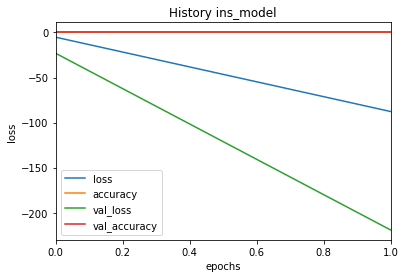

In [52]:
pd.DataFrame(history_1.history).plot(xlabel="epochs", 
ylabel="loss",title="History ins_model", xlim=(0,1))

In [53]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

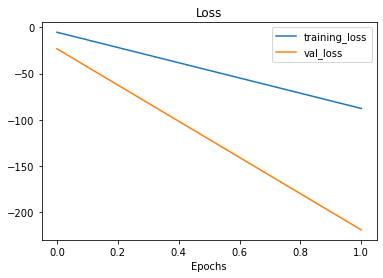

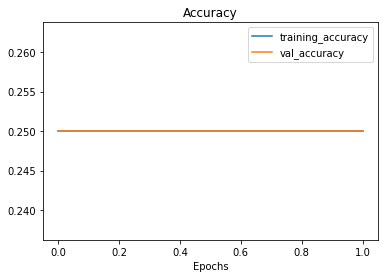

In [54]:
plot_loss_curves(history_1)

In [55]:
model_1.save('model.h5')